In [1]:
import numpy as np
import pandas as pd

### Чтение из файла и первичный анализ

Прочитаем данные и посмотрим на первые 5 строк с помощью метода `head`:

In [2]:
df = pd.read_csv('sot_oper.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


По умолчанию `Pandas` выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Укажем значение параметра `presicion` равным 2, чтобы отображать два знака после запятой (а не 6, как установлено по умолчанию.)

In [4]:
pd.set_option('precision', 2)

**Укажите размер данных, названия признаков и их типы**

In [5]:
#ваш код
print(df.size)
print(df.dtypes)

66660
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


Выведите названия столбцов:

In [6]:
#ваш код
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [7]:
#ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` и `object` — это типы признаков. 

**Изменить тип столбца** можно с помощью метода `astype`. Применим этот метод к признаку `Churn` и переведём его в `int64`:

In [8]:
#ваш код
df['Churn'] = df['Churn'].astype('int64')

Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [9]:
#ваш код
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [10]:
#ваш код
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.00,3333.00,3333,3333,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.06,437.18,NaN,NaN,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,NaN,39.82,42.37,NaN,NaN,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,NaN,1.00,408.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,NaN,74.00,408.00,NaN,NaN,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,NaN,101.00,415.00,NaN,NaN,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,NaN,127.00,510.00,NaN,NaN,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00


Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [11]:
#ваш код
df.value_counts('Churn')

Churn
0    2850
1     483
dtype: int64

Сколько всего пользователей, сколько из них — лояльные (значение переменной `Churn` у них — `0`).

Посмотрите на распределение пользователей по переменной `Area code`. Укажите значение параметра `normalize=True`, чтобы посмотреть не абсолютные частоты, а относительные.

In [12]:
#ваш код
df.value_counts('Area code', normalize=True)

Area code
415    0.50
510    0.25
408    0.25
dtype: float64

### Сортировка

`DataFrame` можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по `Total day charge` (`ascending=False` для сортировки по убыванию):

In [13]:
#ваш код
df.sort_values(by='Total day charge', ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0


Отсортируйте по группе столбцов 'Churn', 'Total day charge'


In [14]:
#ваш код
df.sort_values(by=['Churn', 'Total day charge'])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
1052,OR,98,415,Yes,No,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1


### Индексация и извлечение данных

`DataFrame` можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из датафрейма на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Воспользуемся этим для ответа на вопрос: **какова доля нелояльных пользователей в нашем датафрейме?**

In [15]:
#ваш код
df['Churn'].value_counts(normalize=True)[1]

0.14491449144914492

Очень удобной является логическая индексация `DataFrame` по одному столбцу. Выглядит она следующим образом: `df[P(df['Name'])]`, где `P` - это некоторое логическое условие, проверяемое для каждого элемента столбца `Name`. Итогом такой индексации является `DataFrame`, состоящий только из строк, удовлетворяющих условию `P` по столбцу `Name`. 

Воспользуемся этим для ответа на вопрос: **каковы средние значения числовых признаков среди нелояльных пользователей?**

In [16]:
#ваш код
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбинировав предыдущие два вида индексации, ответим на вопрос: **сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи**?

In [17]:
#ваш код
df[df['Churn'] == 0]['Total day calls'].mean()

100.28315789473685

**Какова максимальная длина международных звонков среди лояльных пользователей (`Churn == 0`), не пользующихся услугой международного роуминга (`'International plan' == 'No'`)?**

In [18]:
#ваш код
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl charge'].max()

5.1

Датафреймы можно индексировать как по названию столбца или строки, так и по порядковому номеру. Для индексации **по названию** используется метод **`loc`**, **по номеру** — **`iloc`**.

В первом случае мы говорим _«передай нам значения для id строк от 0 до 5 и для столбцов от State до Area code»_, а во втором — _«передай нам значения первых пяти строк в первых трёх столбцах»_. 

В случае `iloc` срез работает как обычно, однако в случае `loc` учитываются и начало, и конец среза. Да, неудобно, да, вызывает путаницу.

In [19]:
#ваш код
df.loc[:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [20]:
#ваш код
df.iloc[:5, :3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Метод `ix` индексирует и по названию, и по номеру, но он вызывает путаницу, и поэтому был объявлен устаревшим (deprecated).

Если нам нужна первая или последняя строчка датафрейма, пользуемся конструкцией `df[:1]` или `df[-1:]`:

In [21]:
#ваш код
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


### Применение функций: `apply`, `map` и др.

**Применение функции к каждому столбцу:**

In [22]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Метод `apply` можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`.

**Применение функции к каждой ячейке столбца**

Допустим, по какой-то причине нас интересуют все люди из штатов, названия которых начинаются на 'W'. В данном случае это можно сделать по-разному, но наибольшую свободу дает связка `apply`-`lambda` – применение функции ко всем значениям в столбце.

In [23]:
#ваш код
df[df['State'].apply(lambda x: x.startswith('W'))]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,0
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,0
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


Метод `map` можно использовать и для **замены значений в колонке**, передав ему в качестве аргумента словарь вида `{old_value: new_value}`: Например, в 'International plan' изменить {'No' : False, 'Yes' : True}

In [24]:
#ваш код
df['International plan'].map({'No' : False, 'Yes' : True})

0       False
1       False
2       False
3        True
4        True
        ...  
3328    False
3329    False
3330    False
3331     True
3332    False
Name: International plan, Length: 3333, dtype: bool

Аналогичную операцию можно провернуть с помощью метода `replace` в колонке 'Voice mail plan'

In [25]:
#ваш код
df['Voice mail plan'].replace({'No' : False, 'Yes' : True})

0        True
1        True
2       False
3       False
4       False
        ...  
3328     True
3329    False
3330    False
3331    False
3332     True
Name: Voice mail plan, Length: 3333, dtype: bool

### Группировка данных

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`). 
2. К полученным группам применяется функция или несколько функций.

**Группирование данных в зависимости от значения признака `Churn` и вывод статистик по трём столбцам в каждой группе.**

In [26]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

Сделать то же самое, но немного по-другому, передав в `agg` список функций np.mean, np.std, np.min, np.max:

In [27]:
#ваш код
df.groupby(by='Churn')[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [28]:
#ваш код
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Пользователи `Excel` используют **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Посмотрите среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [29]:
#ваш код
pd.pivot_table(df, values=['Total day calls', 'Total eve calls', 'Total night calls'], 
               index=['Area code'], aggfunc=np.mean)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Преобразование датафреймов

Как и многие другие вещи, добавлять столбцы в `DataFrame` можно несколькими способами.

Например, мы хотим посчитать общее количество звонков для всех пользователей. Создадим объект `total_calls` типа `Series` и вставим его в датафрейм:

In [30]:
total_calls = pd.Series(df[['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']].sum(axis='columns'))
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)
# loc - номер столбца, после которого нужно вставить данный Series
# мы указали len(df.columns), чтобы вставить его в самом конце
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


Добавить столбец из имеющихся можно и проще, не создавая промежуточных `Series`:

In [31]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Чтобы удалить столбцы или строки, воспользуйтесь методом `drop`, передавая в качестве аргумента нужные индексы и требуемое значение параметра `axis` (`1`, если удаляете столбцы, и ничего или `0`, если удаляете строки):

In [32]:
# избавляемся от созданных только что столбцов
df = df.drop(['Total calls', 'Total charge'], axis=1)
# удалить строчки

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


--------



## подготовка к прогнозированию оттока


Посмотрите, как отток связан с признаком *"Подключение международного роуминга"* (`International plan`). 
<p>Сделайте это с помощью сводной таблицы `crosstab`, а также путем иллюстрации с `Seaborn`

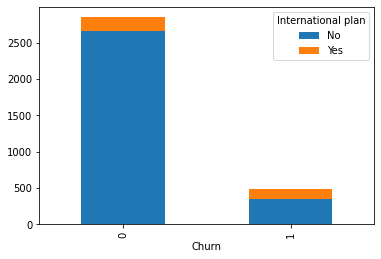

In [33]:
#ваш код
import seaborn as sns
import matplotlib.pyplot as plt

pd.crosstab(df['Churn'], df['International plan'])

pd.crosstab(df['Churn'], df['International plan']).plot.bar(stacked=True)
plt.show()

Показать долю оттока , когда роуминг подключен.

Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку. 

In [34]:
#ваш код
temp = pd.crosstab(df['Churn'], df['International plan'])
print(temp.loc[1, 'Yes'] / sum(temp['Yes']))

0.4241486068111455


In [35]:
#ваш код

Далее посмотрим на еще один важный признак – *"Число обращений в сервисный центр"* (`Customer service calls`). <p> Здесь надо также построить
сводную таблицу и картинку.

In [36]:
#ваш код
print(pd.crosstab(df['Churn'], df['Customer service calls']))

Customer service calls    0     1    2    3   4   5   6  7  8  9
Churn                                                           
0                       605  1059  672  385  90  26   8  4  1  0
1                        92   122   87   44  76  40  14  5  1  2


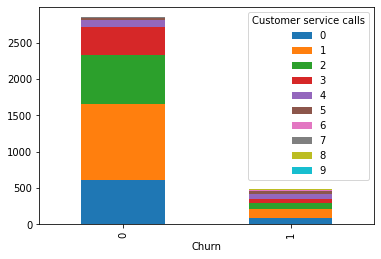

In [37]:
#ваш код
pd.crosstab(df['Churn'], df['Customer service calls']).plot.bar(stacked=True)
plt.show()

Добавьте теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрите, как он связан с оттоком. 

In [38]:
#ваш код
df["Many cutomer calls"] = df['Customer service calls'] > 3

In [39]:
#ваш код
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many cutomer calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,False


Объедините рассмотренные выше условия и постройте сводную таблицу для этого объединения и оттока.

Many cutomer calls  False  True 
Churn                           
0                    2721    129
1                     345    138


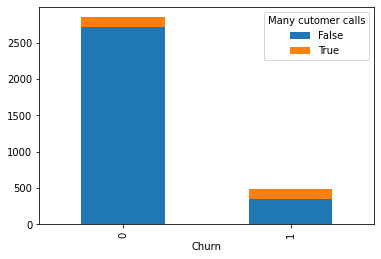

In [40]:
#ваш код
print(pd.crosstab(df['Churn'], df['Many cutomer calls']))

pd.crosstab(df['Churn'], df['Many cutomer calls']).plot.bar(stacked=True)
plt.show()